In [14]:
import pandas as pd #manipulating csv data
import numpy as np #math calculations
        
df  = pd.read_csv("2.5.2 Weather Nominal Data.csv")
df1  = pd.read_csv("2.5.2 Weather Nominal Data.csv")
df.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [2]:
#one hot encodes categorical values to be used in decision tree

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

df_num_cat = pd.DataFrame()

df_num_cat["outlook"] = enc.fit_transform(df["outlook"])
df_num_cat["temperature"] = enc.fit_transform(df["temperature"])
df_num_cat["humidity"] = enc.fit_transform(df["humidity"])
df_num_cat["windy"] = enc.fit_transform(df["windy"])
df_num_cat["play"] = enc.fit_transform(df["play"])

df_num_cat

,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [3]:
# all data to be considered, minus the target values
X = df_num_cat.drop(["play"],axis=1)
# target values
y = df_num_cat["play"]

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion="entropy")
dt_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(267.84000000000003, 587.0880000000001, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(200.88000000000002, 456.624, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(334.80000000000007, 456.624, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(200.88000000000002, 326.1600000000001, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(133.92000000000002, 195.69600000000003, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(66.96000000000001, 65.23200000000008, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 65.23200000000008, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 195.69600000000003, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(468.72, 326.1600000000001, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(401.76000000000005, 195.69600000000003, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(535.6800000000001, 195.696000000

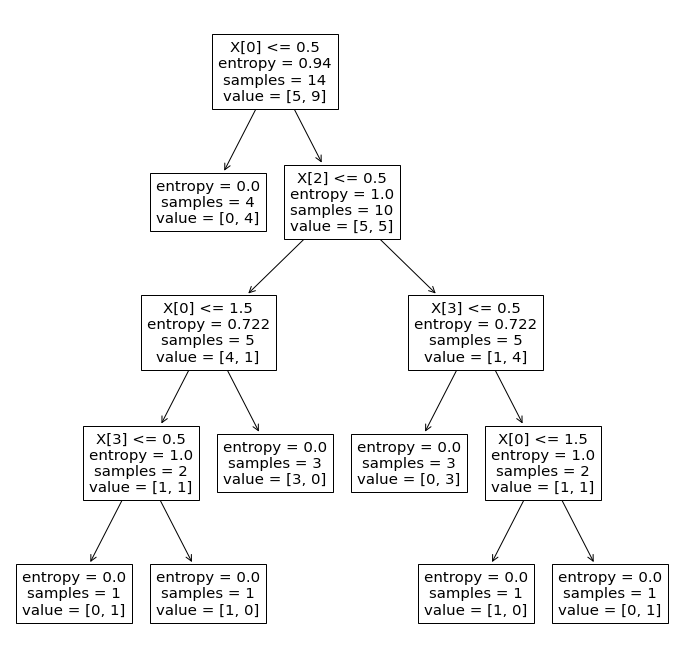

In [5]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

tree.plot_tree(dt_clf)

In [6]:
#https://www.youtube.com/watch?v=g90i4mvw9Qs
#https://www.kaggle.com/code/sdk1810/decision-tree-for-playtennis
#https://scikit-learn.org/stable/modules/tree.html#tree

In [7]:
# The predictions are stored in X_pred
X_pred = dt_clf.predict(X)

In [15]:
# verifying if the model has predicted it all right.
X_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool

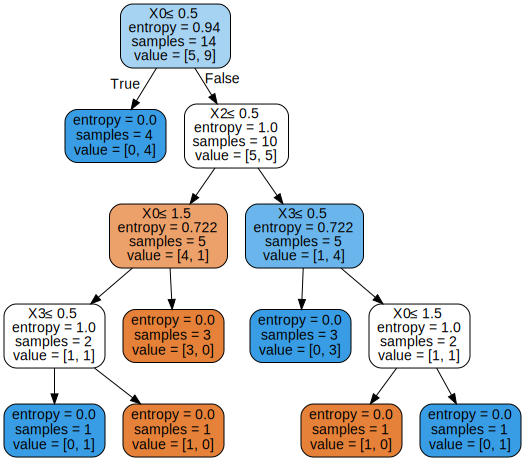

In [18]:
import graphviz 
#dot_data = tree.export_graphviz(dt_clf, out_file=None) 
#graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(dt_clf, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 